# Versuch 253: Absorption von $\alpha$-,$\beta$-,$\gamma$-Strahlung

### Pakete

In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chi2
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams["figure.figsize"][0] = 10
plt.rcParams["figure.figsize"][1] = 7
plt.rcParams['errorbar.capsize']=2

### 1. Messung des Nulleffekts

In [2]:
#Spannung in V
U1=540
U1_err=10

#Zerfälle in 5 Minuten
n0=118
n0_err=np.sqrt(n0)
#Zerfälle pro Sekunde
n0_s=n0/300
n0_s_err=n0_err/300

### 2. Absorption von $\beta$-Strahlung in Aluminium


In [3]:
#Anzahl der Zerfälle
n_beta=np.array([1349,706,588,353,342,216,146,74,135,103,66,148])
n_beta_err=np.sqrt(n_beta)

#Messzeit
T=np.array([30,30,30,30,30,30,30,30,120,120,120,300])

#Dicke in mm
x1=np.array([0,0.3,0.6,0.9,1.2,1.5,1.8,2.1,2.4,2.7,3,4])

#Bestimmung von n0_beta in Zerfälle/s
n0_beta=n_beta[11]/T[11]
n0_beta_err=n_beta_err[11]/T[11]

#abzug der Nullmessung
n_beta_korr=n_beta/T-n0_beta
n_beta_korr_err=np.sqrt((n_beta_err/T)**2+n0_beta_err**2)

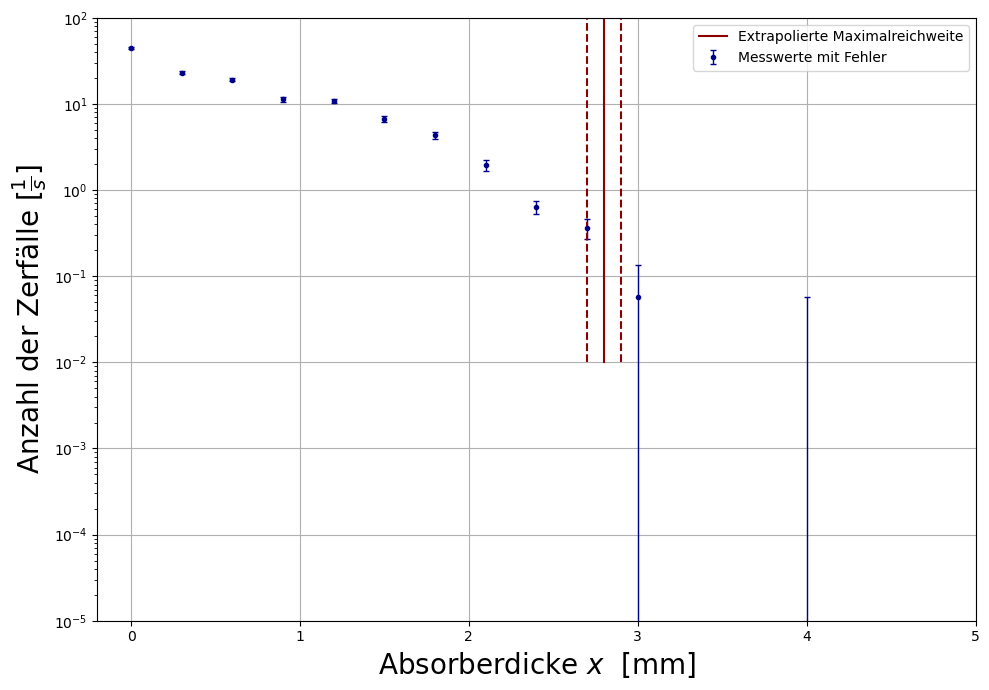

In [4]:
#Plotten
plt.errorbar(x1,n_beta_korr, yerr=n_beta_korr_err,linewidth=1,linestyle='',marker='.',color='darkblue',label='Messwerte mit Fehler')
plt.plot(2*[2.8],[1e-2,1e2],color='darkred',label='Extrapolierte Maximalreichweite')
plt.plot(2*[2.7],[1e-2,1e2],color='darkred',linestyle='--')
plt.plot(2*[2.9],[1e-2,1e2],color='darkred',linestyle='--')
plt.axis([-0.2, 5, 10**-5, 10**2])
plt.xlabel(r'Absorberdicke $ x$  [mm]', size=20)
plt.ylabel(r'Anzahl der Zerfälle [$\frac{1}{s}$]', size=20)
plt.yscale('log')
plt.legend(frameon=True,loc='best')
plt.grid()
plt.tight_layout()
plt.savefig('V253Diagramm1a.pdf', format='PDF')

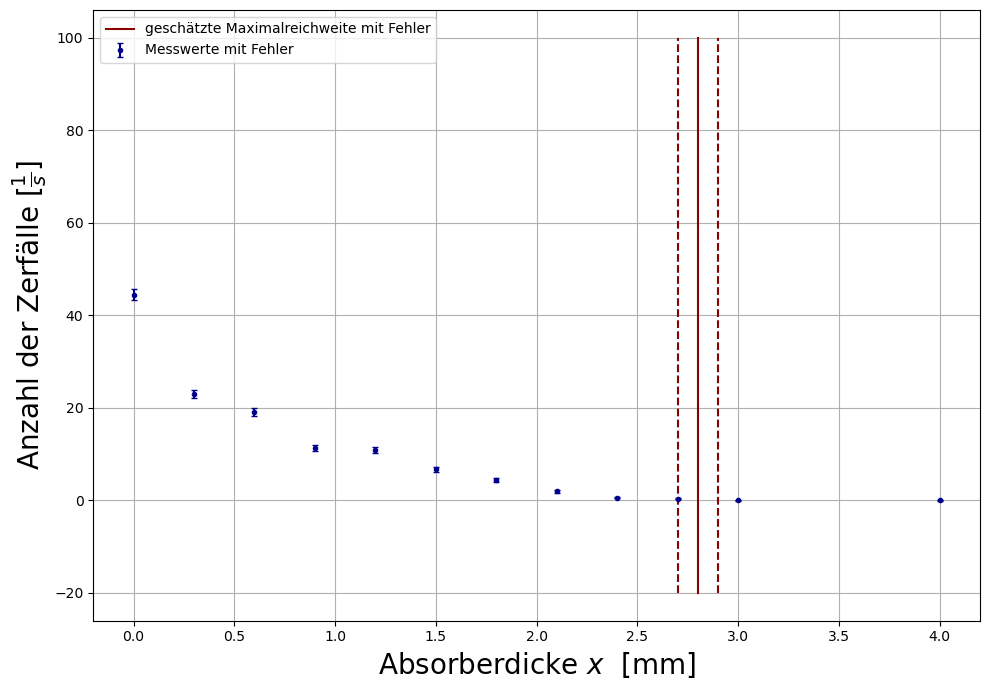

In [5]:
#Die Daten werden nochmal nicht Logarithmisch geplottet, da manche werte negativ werden würden
#und man so besser erkennt, wo die Maximalreichweite ist.
plt.errorbar(x1,n_beta_korr, yerr=n_beta_korr_err,color='darkblue',linestyle='',marker='.',label='Messwerte mit Fehler')
plt.plot(2*[2.8],[-20,1e2],color='darkred',label='geschätzte Maximalreichweite mit Fehler')
plt.plot(2*[2.7],[-20,1e2],color='darkred',linestyle='--')
plt.plot(2*[2.9],[-20,1e2],color='darkred',linestyle='--')
plt.xlabel(r'Absorberdicke $ x$  [mm]', size=20)
plt.ylabel(r'Anzahl der Zerfälle [$\frac{1}{s}$]', size=20)
plt.legend(frameon=True)
plt.grid()
plt.tight_layout()
plt.savefig('V253Diagramm1b.pdf', format='PDF')

In [6]:
#Reichweite welche aus Plots abgelesen wurde in cm
x_max=0.28
x_max_err=0.01

r_alu=2.6986  #in g/cm^3
r_beta_ES= 0.130  #in g/cm^2

#Flächendichte r_beta
R_beta=r_alu*x_max+r_beta_ES
R_beta_err=r_alu*x_max_err

print('Flächendichte:')
print('R_beta = (',R_beta,' +/- ',R_beta_err,') g/cm^2')

#Aus Abbildung 8 des Skriptes:
E_max=1.9
E_max_err=0.2
print('Maximalenergie:')
print(' E_max = (',E_max,'+/-',E_max_err,') MeV')


#Verleich mit dem Literaturwert welcher aus dem Skiprt hervor geht:
E_max_lit=2.274 #in MeV

abw=np.abs(E_max-E_max_lit)
abw_err=E_max_err

sigma=abw/abw_err

print('Damit ergibt sich eine Sigma Abweichung von: Sigma =',round(sigma,2))

Flächendichte:
R_beta = ( 0.8856080000000001  +/-  0.026986 ) g/cm^2
Maximalenergie:
 E_max = ( 1.9 +/- 0.2 ) MeV
Damit ergibt sich eine Sigma Abweichung von: Sigma = 1.87


### 3. Absorption von $\gamma$-Strahlung in Blei 

In [7]:
#Anzahl Zerfälle
n_gamma=np.array([1833,1312,976,729,555,402,300,233,196,144,111])
n_gamma_err=np.sqrt(n_gamma)


#Absorberdicke
x2=10*np.array([0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])

#Abzug der Nullmessung mit Torzeit von 60s
n_gamma_korr=1/60*(n_gamma-(n0_s*60)*np.ones(11))  #in Zerfälle/s
n_gamma_korr_err=1/60*np.sqrt(n_gamma_err**2+(60*n0_s_err*np.ones(11))**2)

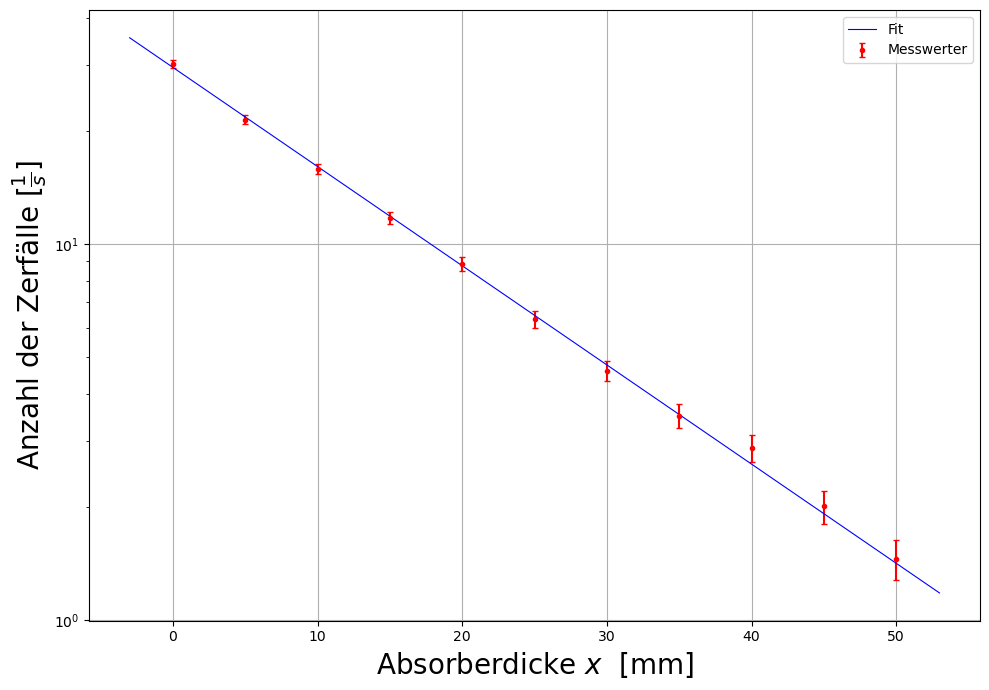

In [8]:
def exp_fit(x,a,b):
    return a*np.exp(-b*x)
popt,pcov=curve_fit(exp_fit,x2,n_gamma_korr,sigma=n_gamma_korr_err,p0=[62,0.05])

plt.errorbar(x2,n_gamma_korr, yerr=n_gamma_korr_err,color='red',label='Messwerter',linestyle='', marker='.')
plt.plot(np.linspace(-3,53,2),exp_fit(np.linspace(-3,53,2),*popt),color='blue',label='Fit', linewidth=0.8)
plt.xlabel(r'Absorberdicke $ x$  [mm]', size=20)
plt.ylabel(r'Anzahl der Zerfälle [$\frac{1}{s}$]', size=20)
plt.yscale('log')
plt.legend(frameon=True,loc='best')
plt.grid()

plt.tight_layout()
plt.savefig('V253Diagramm2.pdf', format='PDF')


In [9]:
chi_squared2=np.sum((exp_fit(x2,*popt)-n_gamma_korr)**2/n_gamma_korr_err**2)
dof2=len(n_gamma_korr)-2
chi_squared2_red=chi_squared2/dof2
prob2=round(1-chi2.cdf(chi_squared2,dof2),2)*100
print('chi_quadrat=',chi_squared2)
print('chi_quadrat_red=',chi_squared2_red)
print('Fitwahrscheinlichkeit=', prob2)

chi_quadrat= 3.4872107826894774
chi_quadrat_red= 0.38746786474327527
Fitwahrscheinlichkeit= 94.0


In [10]:
mu=10*popt[1]  #in 1/cm
mu_err=10*(pcov[1,1])**0.5
print('Schwächungskoeffizient: mu=', mu,'+-',mu_err)

rho_pb=11.342 #in g/cm^3

mu_rho=mu/rho_pb  #in cm^2/g
mu_rho_err=mu_rho*(mu_err/mu)
E_gamma_lit = 1.333
E_gamma =0.9
E_gamma_error =0.1

sigma = (E_gamma_lit-E_gamma)/E_gamma_error

print('Massenschwächungskoeffizient mu/rho: mu/rho=',mu_rho,'+-',mu_rho_err,'Sigma:',sigma)

Schwächungskoeffizient: mu= 0.6077319241004607 +- 0.006630955322392858
Massenschwächungskoeffizient mu/rho: mu/rho= 0.05358243026807095 +- 0.0005846372176329446 Sigma: 4.329999999999999


### 4. Aktivität des $\gamma$-Strahlers

In [11]:
#Abstand
d=np.array([0.05,0.10,0.20]) #m
d_err=0.004*np.ones(3)

n=1/60*np.array([26117,6987,1911])
n_err=1/60*np.sqrt(60*n)
#Radius Zählrohr
r=7e-3
#Wahrscheinlichkeit, dass das Zählrohr anspricht
prob= 0.04 

#Raumwinkel
Omega=np.pi*r**2/d**2
Omega_err=Omega*2*d_err/d

A=0.5*4*n/prob*d**2/r**2 #Faktor 0.5, da 2 gamma-Quanten pro Zerfall
A_err=A*np.sqrt((n_err/n)**2+(2*d_err/d)**2)

print('Aktivität Gamma Strahler: A=',A*1e-3,'+-',A_err*1e-3,'kBq')

Aktivität Gamma Strahler: A= [1110.41666667 1188.26530612 1300.        ] +- [177.79948267  96.11827265  59.90286923] kBq


In [12]:
#Literaturwert am 02.02.2015
A0= 3700  #kBq
#Datum des Versuchs:10.11.2021
del_t= 2473
T12=5.27*365

#Aktivität am Tag des Versuchs
A_lit=A0*np.exp(-np.log(2)*del_t/T12)
print('A_lit=',A_lit,'Bq')

#Vergleiche Literaturwert mit Messwert
abw_A=np.abs(A*1e-3-A_lit)
abw_A_err=A_err*1e-3

sigma= abw_A/abw_A_err

print('Differenz zu Literaturwerten: dA=',abw_A,'+-',abw_A_err,'kBq')
print('Sigmaabweichung=',sigma)


A_lit= 1517.6946286781042 Bq
Differenz zu Literaturwerten: dA= [407.27796201 329.42932256 217.69462868] +- [177.79948267  96.11827265  59.90286923] kBq
Sigmaabweichung= [2.29065887 3.42733295 3.6341269 ]


### Winkelkorrektur

In [13]:
#Länge Zählrohr
l=4e-2 #m

#Korrekturfaktor k1=(1+0.5*l/d)**2
k1=(1+0.5*l/d)**2
k1_err=2*(1+0.5*l/d)*0.5*l/d**2*d_err

print('Korrekturfaktor k1=',k1,'+-',k1_err)
#korrigierte Aktivität
A_korr=A*k1
A_korr_err=A_korr*np.sqrt((A_err/A)**2+(k1_err/k1)**2)

print('Korrigierte Aktivität: A_korr=',A_korr*1e-3,'+-',A_korr_err*1e-3,'kBq')
#Vergleich der Messwerte mit Literaturwert
abw_A_korr=np.abs(A_korr*1e-3-A_lit)
abw_A_korr_err=A_korr_err*1e-3
sigma= abw_A_korr/abw_A_korr_err

print('Differenz zu Literaturwerten: dA=',abw_A_korr,'+-',abw_A_korr_err,'kBq')
print('Sigmaabweichung=',sigma)

Korrekturfaktor k1= [1.96 1.44 1.21] +- [0.0896 0.0192 0.0044]
Korrigierte Aktivität: A_korr= [2176.41666667 1711.10204082 1573.        ] +- [362.41151032 140.27802713  72.70782016] kBq
Differenz zu Literaturwerten: dA= [658.72203799 193.40741214  55.30537132] +- [362.41151032 140.27802713  72.70782016] kBq
Sigmaabweichung= [1.81760794 1.37874346 0.76065231]


### Absorptionskorrektur

In [14]:
d=0.14 #cm
rho_kapsel=7.9 #g/cm^3
#mu_rho aus vorherigem Aufgabenteil
mu_kapsel=mu_rho*rho_kapsel #1/cm
mu_kapsel_err=mu_kapsel*mu_rho_err/mu_rho

#Korrekturfaktor k2=exp(mu*x)
k2=np.exp(mu_kapsel*d)
k2_err=k2*d*mu_kapsel_err

print('Korrekturfaktor k2=',k2,'+-',k2_err)


#korrigierte Aktivität A_korr2=A_korr*k2
A_korr2=A_korr*k2
A_korr2_err=A_korr2*np.sqrt((A_korr_err/A_korr)**2+(k2_err/k2)**2)
print('Korrigierte Aktivität: A_korr2=',A_korr2*1e-3,'+-',A_korr2_err*1e-3)

abw_A_korr2=np.abs(A_korr2*1e-3-A_lit)
abw_A_korr2_err=A_korr2_err*1e-3
sigma= abw_A_korr2/abw_A_korr2_err

print('Differenz zu Literaturwerten: dA=',abw_A_korr2,'+-',abw_A_korr2_err,'kBq')
print('Sigmaabweichung=',sigma)

Korrekturfaktor k2= 1.0610533783902387 +- 0.0006860864121617283
Korrigierte Aktivität: A_korr2= [2309.29425695 1815.57060118 1669.03696421] +- [384.54085654 148.84710423  77.15442646]
Differenz zu Literaturwerten: dA= [791.59962827 297.8759725  151.34233553] +- [384.54085654 148.84710423  77.15442646] kBq
Sigmaabweichung= [2.05855793 2.00122115 1.96155091]


Ausgabe unabhängig von A_korr (zur Probe)

In [15]:
A_korrzwei=A*k2
A_korrzwei_err=A_korrzwei*np.sqrt((A_err/A_korr)**2+(k2_err/k2)**2)
print('Korrigierte Aktivität: A_korrzwei=',A_korrzwei*1e-3,'+-',A_korrzwei_err*1e-3)

abw_A_korrzwei=np.abs(A_korrzwei*1e-3-A_lit)
abw_A_korrzwei_err=A_korrzwei_err*1e-3
sigma= abw_A_korrzwei/abw_A_korrzwei_err

print('Differenz zu Literaturwerten: dA=',abw_A_korrzwei,'+-',abw_A_korrzwei_err,'kBq')
print('Sigmaabweichung=',sigma)

Korrigierte Aktivität: A_korrzwei= [1178.21135559 1260.81291749 1379.36939191] +- [96.25543422 70.82873224 52.53661431]
Differenz zu Literaturwerten: dA= [339.48327309 256.88171119 138.32523677] +- [96.25543422 70.82873224 52.53661431] kBq
Sigmaabweichung= [3.52689981 3.62680092 2.63293017]


### 5. Absorptionsmessung und Energiebestimmung $\alpha$-Strahlung

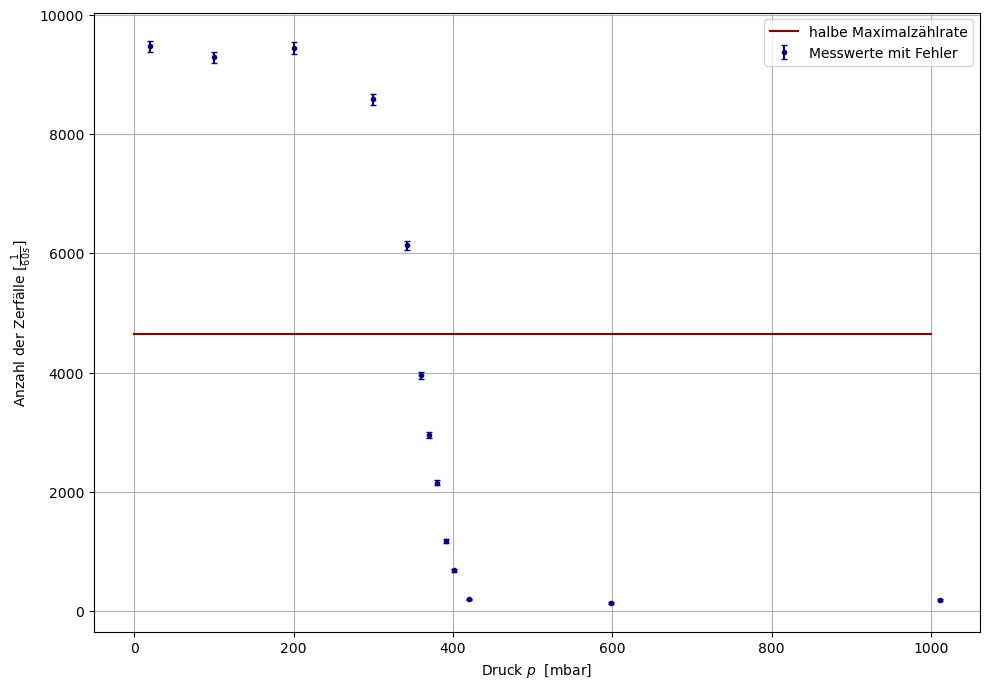

In [16]:
n_alpha=np.array([9469,9286,9439,8587,6131,3953,2948,2154,1176,684,194,136,180])
n_alpha_err=np.sqrt(n_alpha)
#Druck [mbar]
p=np.array([20,100,200,300,342,360,370,380,391,401,420,599,1011])

plt.errorbar(p,n_alpha, yerr=n_alpha_err, color='darkblue',label='Messwerte mit Fehler',linestyle='',marker='.')
plt.xlabel(r'Druck $ p$  [mbar]')
plt.ylabel(r'Anzahl der Zerfälle [$\frac{1}{60s}$]')
plt.plot([0,1e3],2*[0.5*n_alpha[1]],color='darkred',label='halbe Maximalzählrate')
plt.legend(frameon=True,loc='best')
plt.grid()
plt.tight_layout()
plt.savefig('V253Diagramm3.pdf', format='PDF')

In [17]:
#Druck bei dem die Zählrate auf die Hälfte abgefallen ist [mbar]
p1= 375
p1_err=15
p0=1013 
#Abstand [cm]
s0=4.5


#Reichweite bei p1
s1=p1/p0*s0
s1_err=s1*np.sqrt((p1_err/p1)**2)
print('Reichweite s_1 = ' ,s1,'+-',s1_err)

Reichweite s_1 =  1.6658440276406712 +- 0.06663376110562685


In [18]:
#Korrekturen
rho_Gl=2.25 #mg/cm^2
s2=rho_Gl/1.43 #cm

#Goldschicht
s3=0.68 #cm
s_ges=s1+s2+s3
s_ges_err=s1_err

print('Gesamtreichweite s=',s_ges,'+-',s_ges_err)

Gesamtreichweite s= 3.919270601067245 +- 0.06663376110562685


In [19]:
#Aus Abbildung 8 des Skriptes ergibt sich die Energie [MeV]
E_alpha=5.5
E_alpha_err=0.2

#Vergleich mit Literaturwert
E_alpha_lit=5.48 #MeV

abw2=np.abs(E_alpha-E_alpha_lit)
abw2_err=E_alpha_err

sigma= abw2/abw2_err

print('Differenz zu Literaturwerten: dE=',abw2,'+-',abw2_err,'MeV')
print('Sigmaabweichung=',sigma)

Differenz zu Literaturwerten: dE= 0.019999999999999574 +- 0.2 MeV
Sigmaabweichung= 0.09999999999999787
